In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

In [14]:
# Define paths

train_image_path = "dataset\\train\\images"
test_image_path = "dataset\\test\\images"
train_label_path = "dataset\\train\\labels"
test_label_path = "dataset\\test\\labels"

In [15]:
image_path = "dataset\\train\\images\\DJI_0004_03_07.png"

image = cv2.imread(image_path)

image_shape = image.shape

image_height, image_width, num_channels = image_shape

In [16]:
class_names = ["Damage/Dirt", "No Damage/Dirt"]

train_limit = 500
test_limit = 100

if not train_limit:
    train_limit = len(os.listdir(train_image_path))
    test_limit = len(os.listdir(test_image_path))


In [17]:
# Initialize array for images

train_images = np.zeros(train_limit, dtype=(np.float32, (image_height, image_width, num_channels)))
test_images = np.empty(test_limit, dtype=(np.float32, (image_height, image_width, num_channels)))


train_labels = np.zeros(train_limit)
test_labels = np.empty(test_limit)

# 0 -> No damage
# 1 -> Dirt/Damage

In [18]:
# Add train images and labels into array

for idx, image_path in enumerate(os.listdir(train_image_path)[:train_limit]):
    image = cv2.imread(os.path.join(train_image_path, image_path))
    # image = cv2.resize(image, target_image_size)
    image = image / 255.0  # Scale pixel values to [0, 1]
    train_images[idx] = image

    label_path = image_path[:-3] + "txt"

    with open(os.path.join(train_label_path, label_path), 'r') as f:
         train_labels[idx] = (f.read().strip() == class_names[1])

In [19]:
# Add test images and labels into array

for idx, image_path in enumerate(os.listdir(test_image_path)[:test_limit]):
    image = cv2.imread(os.path.join(test_image_path, image_path))
    # image = cv2.resize(image, target_image_size)
    image = image / 255.0  # Scale pixel values to [0, 1]
    test_images[idx] = image

    label_path = image_path[:-3] + "txt"

    with open(os.path.join(test_label_path, label_path), 'r') as f:
         test_labels[idx] = (f.read().strip() == class_names[1])

In [20]:
# Define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Use a single unit with sigmoid activation for binary classification

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', 'Precision', 'Recall'])

In [21]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels), batch_size=30)

Epoch 1/10
17/17 [==============================] - 70s 4s/step - loss: 5.7844 - accuracy: 0.5460 - precision: 0.6210 - recall: 0.4857 - val_loss: 0.8717 - val_accuracy: 0.5400 - val_precision: 0.5400 - val_recall: 1.0000
Epoch 2/10
17/17 [==============================] - 71s 4s/step - loss: 0.6502 - accuracy: 0.6620 - precision: 0.6832 - recall: 0.7393 - val_loss: 0.5795 - val_accuracy: 0.7200 - val_precision: 0.6667 - val_recall: 0.9630
Epoch 3/10
17/17 [==============================] - 54s 3s/step - loss: 0.5467 - accuracy: 0.7500 - precision: 0.7609 - recall: 0.8071 - val_loss: 0.5410 - val_accuracy: 0.6500 - val_precision: 0.6667 - val_recall: 0.7037
Epoch 4/10
17/17 [==============================] - 54s 3s/step - loss: 0.3446 - accuracy: 0.8620 - precision: 0.8482 - recall: 0.9179 - val_loss: 0.8294 - val_accuracy: 0.5900 - val_precision: 0.8421 - val_recall: 0.2963
Epoch 5/10
17/17 [==============================] - 58s 3s/step - loss: 0.2796 - accuracy: 0.8760 - precision: 0

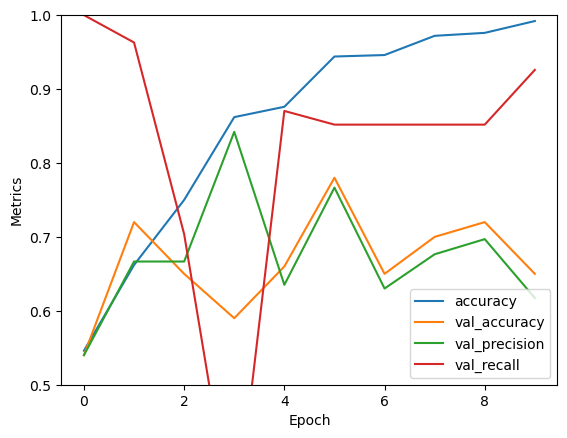

In [22]:
# Plot metrics
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_precision'], label='val_precision')
plt.plot(history.history['val_recall'], label='val_recall')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [23]:
# Evaluate the model
test_loss, test_acc, test_precision, test_recall = model.evaluate(test_images, test_labels, verbose=2)
test_f1_score = 2 * (test_precision * test_recall) / (test_precision + test_recall)
print("test accuracy:", test_acc)
print("test precision:", test_precision)
print("test recall:", test_recall)
print("test F1-score:", test_f1_score)

4/4 - 2s - loss: 2.0767 - accuracy: 0.6500 - precision: 0.6173 - recall: 0.9259 - 2s/epoch - 413ms/step
test accuracy: 0.6499999761581421
test precision: 0.6172839403152466
test recall: 0.9259259104728699
test F1-score: 0.7407407283782959
